### 多重共线性 & VIF

在这里使用 notebook，回答有关多重共线性的测试题目。

让我们导入必要的库以及将要使用的数据，然后开始你的任务吧。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('./house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.`使用 [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) 通过运行下面的单元格来查看数据集中所有定量与解释变量的对应关系。你也可以尝试为 style 或 neighborhood 添加颜色 (**hue**) 。

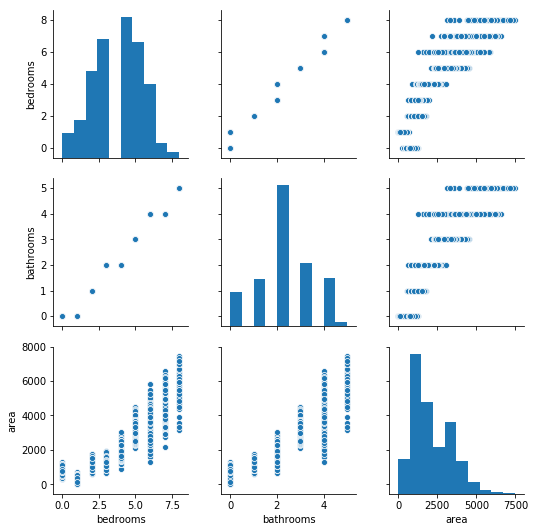

In [2]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area']]);

`2.`  首先，你可以在每个预测变量和价格之间拟合线性模型，并在多重线性回归模型中使用所有变量和价格。每个模型都显示出一种正相关——也就是说，当浴室、卧室或面积增加时，我们预测，房屋价格会上涨。

使用房屋 **price** 、**bedrooms** 、 **bathrooms** 与 **area** 拟合一个线性模型。使用摘要回答下面的第二个测试题目。 **不要忘了添加一个截距。 **

In [3]:
df['intercept'] = 1

lm = sm.OLS(df['price'],df[['intercept', 'bedrooms','bathrooms','area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sat, 03 Nov 2018   Prob (F-statistic):               0.00
Time:                        10:02:48   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` 计算模型中每个变量的 VIF。在下面的测试3中给出关于你的 VIF 结果的见解。 [这里](https://etav.github.io/python/vif_factor_python.html) 有一篇有用的文章，想要了解的话，可以点击进行阅读。

In [4]:
# 生成y，X（dataframe格式）
y, X = dmatrices('price~bedrooms + bathrooms + area', df, return_type = 'dataframe')

# 设定空的vif（dataframe格式）
vif = pd.DataFrame()

# 将X中的元素（intercept、bedrooms、bathrooms、area）分别计算vif
# 并存在VIF Factor列中
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 将对应X的列名存为对应的features
vif["features"] = X.columns

In [5]:
X.shape[1]

4

In [6]:
y.head()

,price
0,598291.0
1,1744259.0
2,571669.0
3,493675.0
4,1101539.0


In [7]:
X.head()

,Intercept,bedrooms,bathrooms,area
0,1.0,3.0,2.0,1188.0
1,1.0,5.0,3.0,3512.0
2,1.0,3.0,2.0,1134.0
3,1.0,4.0,2.0,1940.0
4,1.0,6.0,4.0,2208.0


In [8]:
# vif的结果是VIF Factor 和 Feature对应的
vif

,VIF Factor,features
0,7.327102,Intercept
1,20.854484,bedrooms
2,19.006851,bathrooms
3,5.458190,area





`4.` 从上面的模型中移除 bathrooms。 重新设置多重线性回归模型并重新计算 VIF。 在下面的最后一个测试题目中给出关于你对该结果的看法。

In [9]:
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Sat, 03 Nov 2018   Prob (F-statistic):               0.00
Time:                        10:02:49   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# get y and X dataframes based on this regression:
y, X = dmatrices('price ~ bedrooms + area' , df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# 删除了bathroom之后的数据中，vif没有大于10的，所以多重共线性问题解决
vif

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,bedrooms
2,5.345400,area
